## **Domain-Specific Language Models**


[**John Snow Labs' Healthcare NLP Library**](https://www.johnsnowlabs.com/healthcare-nlp/) is a comprehensive natural language processing library designed specifically for the healthcare domain.



- **Named Entity Recognition (NER)**: The library offers advanced NER models that can identify a wide range of medical entities such as diseases, symptoms, drugs, anatomical terms, procedures, and more.

- **De-identification**: The library can automatically redact or replace personally identifiable information (PII) in clinical texts to ensure patient privacy.

- **Assertion Status Detection**: It can determine the assertion status of medical conditions (e.g., if a condition is present, absent, or hypothetical).

- **Relation Extraction**: The library can identify relationships between medical entities, such as drug-disease interactions, symptom-disease correlations, and more.

- **Clinical Entity Linking**: It includes models to link recognized entities to standard medical terminologies like SNOMED CT, ICD-10, RxNorm, and others.

- **Text Classification**: The library includes models for classifying clinical texts into categories, such as identifying different types of medical notes or classifying patient status.

- **Summarization**: It offers tools to summarize lengthy clinical documents into concise summaries, making it easier for healthcare professionals to quickly grasp essential information.

- **Translation**: The library provides translation models tailored for medical texts, ensuring accurate translation of clinical information between languages.

    


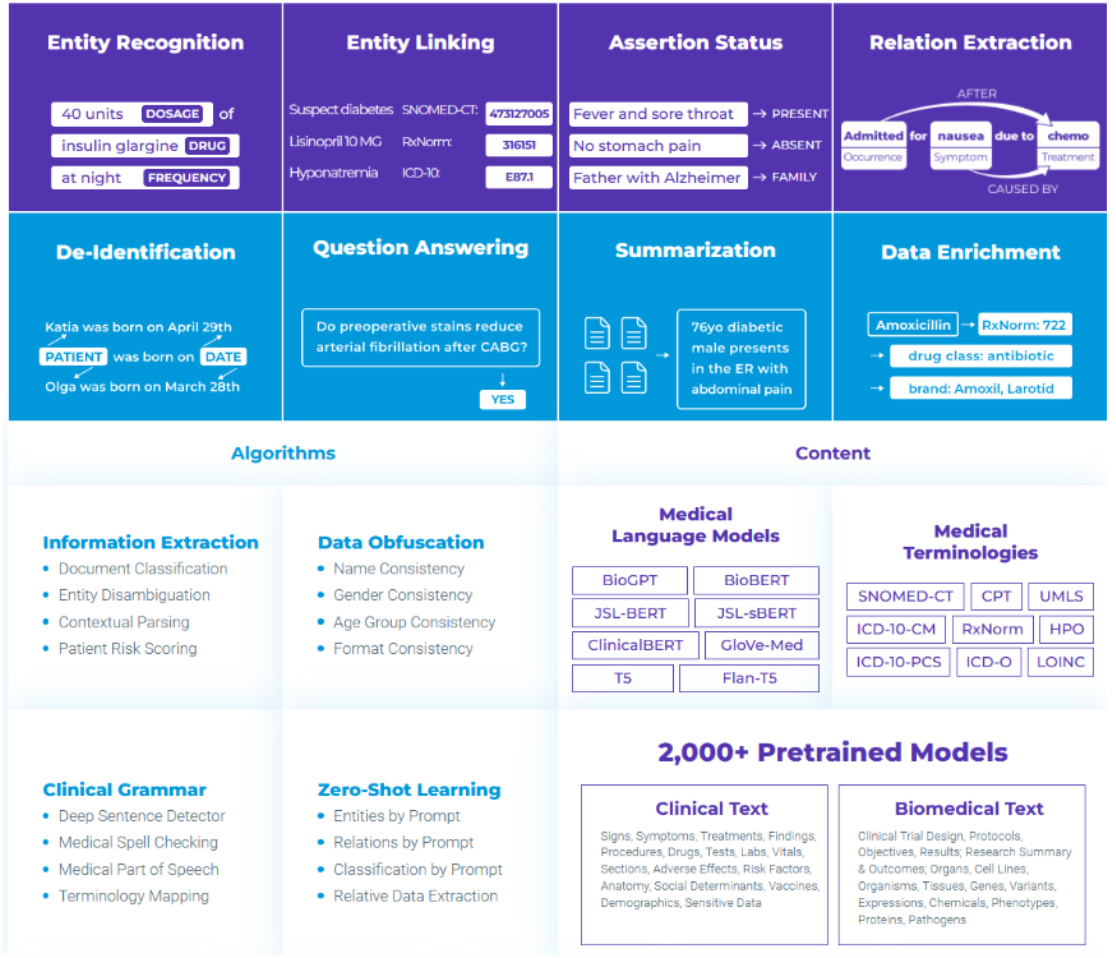

- [**Pretrained Models and Pipelines**](https://nlp.johnsnowlabs.com/models): John Snow Labs offers a variety of pre-trained models and pipelines that are ready to use, significantly reducing the time and effort needed for model training and deployment.

- [**Visualization Tools**](https://sparknlp.org/docs/en/display): Using Spark NLP Display, users can visualize and explain the results of NLP models, making it easier to understand and interpret model outputs.

- [**Integration with Generative AI Lab**](https://annotationlab.johnsnowlabs.com/auth/realms/annotator/protocol/openid-connect/auth?client_id=annotator&response_type=code&redirect_uri=https://annotationlab.johnsnowlabs.com//getUserToken): The library integrates with the Annotation Lab, allowing users to prepare datasets, pre-annotate texts, upload data, and manage annotations efficiently.

Please check our UDEMY courses covering all the details of the John Snow Labs Library:

[**Spark NLP for Data Scientists**](https://www.udemy.com/course/spark-nlp-for-data-scientists/)  


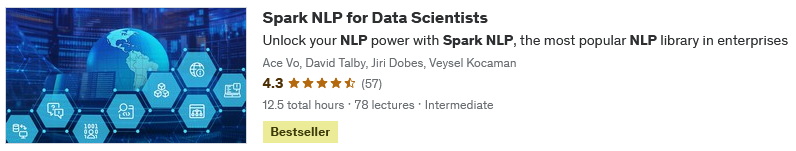

[**Healthcare NLP for Data Scientists**](https://www.udemy.com/course/healthcare-nlp-for-data-scientists/)

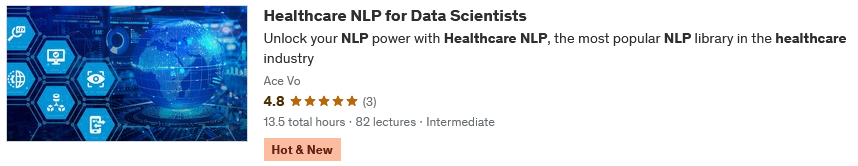

## **Setup and Import Libraries**

You can find the **training license** [here](https://johnsnowlabs-my.sharepoint.com/personal/enes_johnsnowlabs_com/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fenes%5Fjohnsnowlabs%5Fcom%2FDocuments%2FSpark%20NLP%20Training%20Master%2FJuly%202024%20Training%2FMedical%20Language%20Models%20for%20Data%20Scientists%20%20Training%20License%2Ejson&parent=%2Fpersonal%2Fenes%5Fjohnsnowlabs%5Fcom%2FDocuments%2FSpark%20NLP%20Training%20Master%2FJuly%202024%20Training&ct=1720786345976&or=OWA-NT-Mail&cid=cf8292c6-e484-bdd4-2415-6b9a6c0af68e&ga=1).

In [ ]:
import json
import os

from google.colab import files

license_keys = files.upload()

with open(list(license_keys.keys())[0]) as f:
    license_keys = json.load(f)

locals().update(license_keys)

os.environ.update(license_keys)

In [ ]:
# Installing pyspark and spark-nlp
! pip install --upgrade -q pyspark==3.4.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark NLP Healthcare
! pip install --upgrade -q spark-nlp-jsl==$JSL_VERSION  --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

# Installing Spark NLP Display Library for visualization
! pip install -q spark-nlp-display

In [ ]:
import sparknlp
import sparknlp_jsl

from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *
from sparknlp_jsl.pretrained import InternalResourceDownloader

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml import Pipeline,PipelineModel

import pandas as pd
pd.set_option('display.max_colwidth', 200)

import warnings
warnings.filterwarnings('ignore')

params = {"spark.driver.memory":"16G",
          "spark.kryoserializer.buffer.max":"2000M",
          "spark.driver.maxResultSize":"2000M"}

print("Spark NLP Version :", sparknlp.version())
print("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark = sparknlp_jsl.start(license_keys['SECRET'],params=params)

spark

Spark NLP Version : 5.4.1
Spark NLP_JSL Version : 5.4.1


## **Pretrained Pipelines**

John Snow Labs Healthcare NLP offers a variety of pretrained pipelines, which provide an efficient way to perform complex NLP tasks **without the need** for building an extensive pipeline by yourself.

These pipelines are **collections of models** and processing steps bundled together to achieve a specific task, such as named entity recognition (NER), assertion status detection or relation extraction, in a single operation.

#### **List of Pipelines**

In [ ]:
from sparknlp_jsl.pretrained import InternalResourceDownloader

InternalResourceDownloader.showPrivatePipelines(lang='en')

+--------------------------------------------------------------+------+---------+
| Pipeline                                                     | lang | version |
+--------------------------------------------------------------+------+---------+
| clinical_analysis                                            |  en  | 2.4.0   |
| clinical_ner_assertion                                       |  en  | 2.4.0   |
| clinical_deidentification                                    |  en  | 2.4.0   |
| explain_clinical_doc_ade                                     |  en  | 2.7.3   |
| recognize_entities_posology                                  |  en  | 3.0.0   |
| explain_clinical_doc_carp                                    |  en  | 3.0.0   |
| explain_clinical_doc_ade                                     |  en  | 3.0.0   |
| explain_clinical_doc_era                                     |  en  | 3.0.0   |
| icd10cm_snomed_mapping                                       |  en  | 3.0.2   |
| snomed_icd10cm

**Pretrained Clinical Pipelines**

In order to save you from creating a pipeline from scratch, Spark NLP also has a pre-trained pipelines that are already fitted using certain annotators and transformers according to various use cases.

**1.   explain_clinical_doc_granular** :

> A pipeline with `ner_jsl`, `assertion_jsl` and `re_test_result_date`. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

**2.   explain_clinical_doc_carp** :

> A pipeline with `ner_clinical`, `assertion_dl`, `re_clinical` and `ner_posology`. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

**3.   explain_clinical_doc_era** :

> A pipeline with `ner_clinical_events`, `assertion_dl` and `re_temporal_events_clinical`. It will extract clinical entities, assign assertion status and find temporal relationships between clinical entities.

**4.   explain_clinical_doc_ade** :

> A pipeline for `Adverse Drug Events (ADE)` with `ner_ade_biobert`, `assertiondl_biobert`, `classifierdl_ade_conversational_biobert` and `re_ade_biobert`. It will classify the document, extract `ADE` and `DRUG` entities, assign assertion status to `ADE` entities, and relate them with `DRUG` entities, then assign ADE status to a text (`True` means ADE, `False` means not related to ADE).

**letter codes in the naming conventions:**

> c : ner_clinical

> e : ner_clinical_events

> r : relation extraction

> p : ner_posology

> a : assertion

> ade : adverse drug events

**Relation Extraction types:**

`re_clinical` >> TrIP (improved), TrWP (worsened), TrCP (caused problem), TrAP (administered), TrNAP (avoided), TeRP (revealed problem), TeCP (investigate problem), PIP (problems related)

`re_temporal_events_clinical` >> `AFTER`, `BEFORE`, `OVERLAP`

**5. explain_clinical_doc_medication:**

> A pipeline for detecting posology entities with the `ner_posology_large` NER model, assigning their assertion status with `assertion_jsl` model, and extracting relations between posology-related terminology with `posology_re` relation extraction model.


**6. explain_clinical_doc_radiology**

> A pipeline for detecting radiology entities with the `ner_radiology` NER model, assigning their assertion status with `assertion_dl_radiology` model, and extracting relations between the diagnosis, test, and findings with `re_test_problem_finding` relation extraction model.

**7. Clinical Deidentification** :

>This pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities.

**8.   explain_clinical_doc_generic** :

> A pipeline with `ner_clinical`, `assertion_dl` and `re_clinical`. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

- Clinical Entity Labels: `PROBLEM`, `TEST`, `TREATMENT`

- Assertion Status Labels: `Present`, `Absent`, `Possible`, `Planned`, `Past`, `Family`, `Hypotetical`, `SomeoneElse`

- Relation Extraction Labels: `TrAP`, `TeRP`, `TrIP`, `TrWP`, `TrCP`, `TrAP`, `TrNAP`, `TeCP`, `PIP`

**9.   explain_clinical_doc_oncology** :

> Pipelines include Named-Entity Recognition, Assertion Status and Relation Extraction models to extract information from oncology texts.


**10.   explain_clinical_doc_vop** :

> Pipelines include Named-Entity Recognition, Assertion Status, Relation Extraction and Entity Resolution models to extract information from clinical texts.

**11.   explain_clinical_doc_public_health** :

> Pipelines include Named-Entity Recognition, Assertion Status and Relation Extraction models to extract information from clinical texts.

**12.   explain_clinical_doc_biomarker** :

> Pipelines include Named-Entity Recognition, Text Matcher, Sentence Classifier and Relation Extraction models to extract information from clinical texts.

**13.   explain_clinical_doc_sdoh** :

> This pipeline is designed to extract all clinical/medical entities, assertion status, and relation informations which may be considered as Social Determinants of Health (SDOH) entities from text.

**14.   explain_clinical_doc_mental_health** :

> This pipeline is designed to extract all mental health-related entities, assertion status, and relation information from text.

**15.   ner_medication_generic_pipeline** :

> This pre-trained pipeline is designed to identify generic `DRUG` entities in clinical texts. It was built on top of the `ner_posology_greedy`, `ner_jsl_greedy`, `ner_drugs_large` and `drug_matcher` models to detect the entities `DRUG`, `DOSAGE`, `ROUTE` and `STRENGTH`, chunking them into a larger entity as `DRUG` when they appear together.

**16. NER Pipelines:**

> Pipelines for all the available pretrained NER models.

**17. BERT Based NER Pipelines**

> Pipelines for all the available Bert token classification models.

**18. ner_profiling_clinical and ner_profiling_biobert:**

> Pipelines for exploring all the available pretrained NER models at once.

**19. ner_model_finder**

> A pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

**20. Resolver Pipelines**

> Pipelines for converting clinical entities to their UMLS CUI codes and medication entities to their ADE, Action, Treatment, UMLS, RxNorm, ICD9, SNOMED and NDC codes.

**21. Oncology Pipelines**

> Pipelines include Named-Entity Recognition, Assertion Status, Relation Extraction and Entity Resolution models to extract information from oncology texts.


**Also, you can find clinical CODE MAPPING pretrained pipelines in this notebook: [Healthcare Code Mapping Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.1.Healthcare_Code_Mapping.ipynb)**




### **Deidentification**

Deidentification involves removing or obfuscating personal information from medical records and datasets to protect patient privacy.

This process ensures that individuals cannot be readily identified, thereby complying with **privacy regulations** such as HIPAA in the United States.

Deidentification allows for the **safe sharing and analysis** of health data for research, policy-making, and other purposes without compromising patient confidentiality.

The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities.

|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|
| 1| [clinical_deidentification](https://nlp.johnsnowlabs.com/2022/09/14/clinical_deidentification_en.html)  |ar, de, en, es, fr, it, pt, ro| 9| [clinical_deidentification_obfuscation_medium](https://nlp.johnsnowlabs.com/2024/02/09/clinical_deidentification_obfuscation_medium_en.html)  |en|
| 2| [clinical_deidentification_augmented](https://nlp.johnsnowlabs.com/2022/03/03/clinical_deidentification_augmented_es_2_4.html)  |es| 10| [clinical_deidentification_obfuscation_small](https://nlp.johnsnowlabs.com/2024/02/09/clinical_deidentification_obfuscation_small_en.html)  |en|
| 3| [clinical_deidentification_generic](https://nlp.johnsnowlabs.com/2024/02/21/clinical_deidentification_generic_en.html)  |en| 11| [clinical_deidentification_slim](https://nlp.johnsnowlabs.com/2023/06/17/clinical_deidentification_slim_en.html)  |en|
| 4| [clinical_deidentification_generic_optimized](https://nlp.johnsnowlabs.com/2024/03/14/clinical_deidentification_generic_optimized_en.html)  |en| 12| [clinical_deidentification_subentity](https://nlp.johnsnowlabs.com/2024/02/21/clinical_deidentification_subentity_en.html)  |en|
| 5| [clinical_deidentification_glove](https://nlp.johnsnowlabs.com/2022/03/04/clinical_deidentification_glove_en_3_0.html)  |en| 13| [clinical_deidentification_subentity_nameAugmented](https://nlp.johnsnowlabs.com/2024/03/14/clinical_deidentification_subentity_nameAugmented_en.html)  |en|
| 6| [clinical_deidentification_glove_augmented](https://nlp.johnsnowlabs.com/2022/09/16/clinical_deidentification_glove_augmented_en.html)  |en| 14| [clinical_deidentification_subentity_optimized](https://nlp.johnsnowlabs.com/2024/03/14/clinical_deidentification_subentity_optimized_en.html)  |en|
| 7| [clinical_deidentification_langtest](https://nlp.johnsnowlabs.com/2024/01/10/clinical_deidentification_langtest_en.html)  |en| 15| [clinical_deidentification_wip](https://nlp.johnsnowlabs.com/2023/06/17/clinical_deidentification_wip_en.html)  |en|
| 8| [clinical_deidentification_multi_mode_output](https://nlp.johnsnowlabs.com/2024/03/27/clinical_deidentification_multi_mode_output_en.html)  |en|

We have also NER pipelines:

|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|
| 1| [ner_deid_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_augmented_pipeline_en_3_0.html)  |en| 10| [ner_deid_sd_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_large_pipeline_en_3_0.html)  |en|
| 2| [ner_deid_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_biobert_pipeline_en_3_0.html)  |en| 11| [ner_deid_sd_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_pipeline_en_3_0.html)  |en|
| 3| [ner_deid_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_biobert_pipeline_en_3_0.html)  |en| 12| [ner_deid_subentity_augmented_i2b2_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_i2b2_pipeline_en_3_0.html)  |en|
| 4| [ner_deid_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_pipeline_en_3_0.html)  |en| 13| [ner_deid_subentity_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_pipeline_en_3_0.html)  |en|
| 5| [ner_deid_generic_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_augmented_pipeline_en_3_0.html)  |en| 14| [ner_deid_subentity_bert_pipeline](https://nlp.johnsnowlabs.com/2023/03/09/ner_deid_subentity_bert_pipeline_ro.html)  |ro|
| 6| [ner_deid_generic_bert_pipeline](https://nlp.johnsnowlabs.com/2023/03/09/ner_deid_generic_bert_pipeline_ro.html)  |ro| 15| [ner_deid_subentity_glove_pipeline](https://nlp.johnsnowlabs.com/2023/03/13/ner_deid_subentity_glove_pipeline_en.html)  |en|
| 7| [ner_deid_generic_glove_pipeline](https://nlp.johnsnowlabs.com/2023/03/13/ner_deid_generic_glove_pipeline_en.html)  |en| 16| [ner_deid_subentity_pipeline](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_subentity_pipeline_ar.html)  |ar, de, it, ro|
| 8| [ner_deid_generic_pipeline](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_generic_pipeline_ar.html)  |ar, de, it, ro| 17| [ner_deid_synthetic_pipeline](https://nlp.johnsnowlabs.com/2023/03/13/ner_deid_synthetic_pipeline_en.html)  |en|
| 9| [ner_deid_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_large_pipeline_en_3_0.html)  |en| 18| [ner_deidentify_dl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deidentify_dl_pipeline_en_3_0.html)  |en|

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
deid_pipeline = PretrainedPipeline("clinical_deidentification", "en", "clinical/models")

clinical_deidentification download started this may take some time.
Approx size to download 1.6 GB
[OK!]


In [ ]:
deid_res = deid_pipeline.annotate("Record date : 2093-01-13 , David Hale , M.D .  Name : Hendrickson , Ora MR 25 years-old . # 719435 Date : 01/13/93 . Signed by Oliveira Sander . Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street. Phone 302-786-5227.")

In [ ]:
deid_res.keys()

dict_keys(['obfuscated', 'ner_chunk', 'sentence'])

In [ ]:
pd.set_option("display.max_colwidth", 100)

df= pd.DataFrame(list(zip(deid_res["sentence"],
                          deid_res["obfuscated"])),
                 columns= ["Sentence", "Obfuscated"])

df

,Sentence,Obfuscated
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-02-08 , Laurita Porta , M.D ."
1,"Name : Hendrickson , Ora MR 25 years-old .",Name : Faye Hoops MR 34 years-old .
2,# 719435 Date : 01/13/93 .,# 147829 Date : 02/08/93 .
3,Signed by Oliveira Sander .,Signed by Florie Husband .
4,Record date : 2079-11-09 .,Record date : 2079-12-05 .
5,Cocke County Baptist Hospital . 0295 Keats Street.,Janetfurt.
6,Phone 302-786-5227.,Phone 562-130-8657.


### **Resolver Pipelines**

**Resolver pipelines** are used for converting clinical entities to their standart healthcare codes.

You will just feed your text and it will return the corresponding codes.



**Resolver Pipelines:**

|index|pipeline|Entity|Target
|-:|:-|:-|:-|
| 1|[umls_disease_syndrome_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_disease_syndrome_resolver_pipeline_en_3_0.html)|Disease and Syndromes|UMLS CUI|
| 2|[umls_drug_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_drug_resolver_pipeline_en_3_0.html)|Drug|UMLS CUI|
| 3|[umls_drug_substance_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/25/umls_drug_substance_resolver_pipeline_en_3_0.html)|Drug Substance|UMLS CUI|
| 4|[medication_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_pipeline_en.html)|Drug|Adverse Reaction, RxNorm, UMLS<br>NDC, SNOMED CT|
| 5|[medication_resolver_transform_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_transform_pipeline_en.html)|Drug|Adverse Reaction, RxNorm<br>UMLS, NDC, SNOMED CT|
| 6|[umls_major_concepts_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/25/umls_major_concepts_resolver_pipeline_en_3_0.html)|Clinical Major Concepts| UMLS CUI|
| 7|[umls_clinical_findings_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_clinical_findings_resolver_pipeline_en_3_0.html)|Clinical Findings|	UMLS CUI|
| 8|[icd9_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/30/icd9_resolver_pipeline_en.html)|Clinical Findings|ICD-9|
| 9|[atc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/atc_resolver_pipeline_en.html)|Drug|ATC|
| 10|[cpt_procedures_measurements_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/cpt_procedures_measurements_resolver_pipeline_en.html)|Procedure, Measurement|CPT|
| 11|[hcc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/hcc_resolver_pipeline_en.html)|Clinical Findings|HCC|
| 12|[hpo_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/hpo_resolver_pipeline_en.html)|Human Phenotype|HPO|
| 13|[cvx_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/10/12/cvx_resolver_pipeline_en.html)|Vaccine|CVX|
| 14|[icd10cm_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/11/02/icd10cm_resolver_pipeline_en.html)|Problem|ICD-10|
| 15|[icd10pcs_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/icd10pcs_resolver_pipeline_en.html)|Procedure|ICD-10-PCS|
| 16|[icdo_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/icdo_resolver_pipeline_en.html)|Problem|ICD-O|
| 17|[loinc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/loinc_resolver_pipeline_en.html)|Test|LOINC|
| 17|[loinc_numeric_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/loinc_numeric_resolver_pipeline_en.html)|Test|LOINC|
| 18|[snomed_body_structure_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/snomed_body_structure_resolver_pipeline_en.html)|Clinical Findings|SNOMED|
| 19|[snomed_findings_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/snomed_findings_resolver_pipeline_en.html)|Clinical Findings|SNOMED CT|
| 20|[snomed_procedures_measurements_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/31/snomed_findings_resolver_pipelin_en.html)|Procedure, Test|SNOMED|
| 21|[mesh_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/25/mesh_resolver_pipeline_en.html)|Clinical Findings|MeSH|
| 22|[ndc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/25/ndc_resolver_pipeline_en.html)|Drug|NDC|
| 23|[ncit_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/25/ncit_resolver_pipeline_en.html)|Clinical Findings|NCIt|
| 24|[rxcui_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/01/rxcui_resolver_pipeline_en.html)|Clinical Findings|RxCUI|
| 25|[hcpcs_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/hcpcs_resolver_pipeline_en.html)|Procedure|HCPCS|
| 26|[hgnc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/hgnc_resolver_pipeline_en.html)|Gene|HGNC|
| 27|[icd10cm_generalised_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/icd10cm_generalised_resolver_pipeline_en.html)|Clinical Findings|ICD-10-CM|
| 28|[abbreviation_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/abbreviation_pipeline_en.html)|ABBR|Definitions and Categories|
| 29|[icd10cm_multi_mapper_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/icd10cm_multi_mapper_pipeline_en.html)|ICD-10-CM|Billable Mappings, HCC Codes<br>Cause Mappings, Claim Mappings<br>SNOMED Codes, UMLS Codes<br> ICD-9 Codes|
| 30|[rxnorm_multi_mapper_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/rxnorm_multi_mapper_pipeline_en.html)|RxNorm|Drug Brand Names, RxNorm Extension Brand Names<br> Action Mappings, Treatment Mappings<br> UMLS Codes, NDC Product Codes<br> NDC Package Codes|
| 31|[rxnorm_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/rxnorm_resolver_pipeline_en.html)|Drug|RxNorm |
| 32|[snomed_multi_mapper_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/snomed_multi_mapper_pipeline_en.html)|SNOMED Codes|ICD-10, ICD-O,UMLS |
| 33|[icd10cm_rxnorm_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/07/icd10cm_rxnorm_resolver_pipeline_en.html)|Drug|ICD-10, RxNorm |
| 34|[snomed_term_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/22/snomed_term_resolver_pipeline_en.html)|SNOMED Codes|SNOMED terms |
| 35|[snomed_auxConcepts_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/12/snomed_auxConcepts_resolver_pipeline_en.html)|Morph Abnormality, Clinical Drug<br>Clinical Drug Form, Procedure<br> Substance, Physical Object<br> Body Structure|SNOMED Codes |
| 36|[snomed_conditions_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_conditions_resolver_pipeline_en.html)|Clinical Findings|SNOMED Codes |
| 37|[snomed_drug_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_drug_resolver_pipeline_en.html)|Drug|SNOMED Codes |
| 38|[snomed_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_resolver_pipeline_en.html)|Clinical Findings, Morph Abnormality<br>Clinical Drug, Clinical Drug Form<br> Procedure, Substance<br>Physical Object, Body Structure|SNOMED Codes |

#### **icd10cm_resolver_pipeline**

This pretrained pipeline extracts clinical conditions and map them to their corresponding **ICD-10-CM codes**.

In [ ]:
resolver_pipeline = PretrainedPipeline("icd10cm_resolver_pipeline", "en", "clinical/models")

text = """A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years and anisakiasis. Also, it was reported that fetal and neonatal hemorrhage"""

result = resolver_pipeline.fullAnnotate(text)[0]

icd10cm_resolver_pipeline download started this may take some time.
Approx size to download 2.4 GB
[OK!]


In [ ]:
result.keys()

dict_keys(['document', 'icd10cm', 'word_embeddings', 'jsl_ner_chunk', 'sentence_embeddings', 'jsl_ner', 'resolver_code', 'icd10cm_mapper', 'clinical_ner', 'token', 'doc_chunk', 'clinical_ner_chunk', 'chunks_fail', 'sentence', 'icd10cm_ner_chunk'])

In [ ]:
import pandas as pd
chunks=[]
entities=[]
icd10cm_code=[]


for n,m in zip(result['icd10cm_ner_chunk'], result['icd10cm']):

    chunks.append(n.result)
    entities.append(n.metadata['entity'])
    icd10cm_code.append(m.result)


df = pd.DataFrame({'chunks':chunks,
                   'entities':entities,
                   'icd10cm_code':icd10cm_code})

df

,chunks,entities,icd10cm_code
0,gestational diabetes mellitus,PROBLEM,O24.4
1,anisakiasis,PROBLEM,B81.0
2,fetal and neonatal hemorrhage,PROBLEM,P54.5


### **Task Based Pretrained Pipelines**

Task Based Pretrained Pipelines  are pre-built, ready-to-use NLP workflows designed for specific tasks.

Part of the Healthcare NLP library, these pipelines come pre-trained on large datasets, allowing users to perform complex NLP tasks like named entity recognition, assertion status detection, relation extraction without extensive setup or training.


|index|pipeline|description|
|-----:|:-----|:-----|
| 1| [explain_clinical_doc_generic](https://nlp.johnsnowlabs.com/2024/01/17/explain_clinical_doc_generic_en.html)  |This pipeline is designed to extract all clinical/medical entities,<br> assign assertion status to the extracted entities,<br> establish relations between the extracted entities from the clinical texts.|
| 2| [explain_clinical_doc_granular](https://nlp.johnsnowlabs.com/2024/01/26/explain_clinical_doc_granular_en.html)  |This pipeline is designed to extract all clinical/medical entities,<br> assign assertion status to the extracted entities,<br> establish relations between the extracted entities from the clinical texts.|
|3| [explain_clinical_doc_biomarker](https://nlp.johnsnowlabs.com/2024/03/11/explain_clinical_doc_biomarker_en.html)  | This specialized biomarker pipeline can extract biomarker entities,<br>classify sentences whether they contain biomarker entities or not,<br>establish relations between the extracted biomarker and biomarker<br>results from the clinical documents.|
4| [explain_clinical_doc_oncology](https://nlp.johnsnowlabs.com/2024/01/18/explain_clinical_doc_oncology_en.html)  |This specialized oncology pipeline can extract oncological entities,<br>  assign assertion status to the extracted entities, <br> establish relations between the extracted entities from the clinical documents.|
| 5| [explain_clinical_doc_radiology](https://nlp.johnsnowlabs.com/2024/01/18/explain_clinical_doc_radiology_en.html) |This pipeline is designed to extract all clinical/medical entities,<br> assign assertion status to the extracted entities,<br> establish relations between the extracted entities from the clinical texts.|
| 6| [explain_clinical_doc_vop](https://nlp.johnsnowlabs.com/2024/01/16/explain_clinical_doc_vop_en.html)|This pipeline is designed to extract healthcare-related terms entities,<br> assign assertion status to the extracted entities, establish relations<br> between the extracted entities from the documents transferred from the patient’s sentences.|
| 7| [explain_clinical_doc_carp](https://nlp.johnsnowlabs.com/2023/06/17/explain_clinical_doc_carp_en.html) |A pipeline with `ner_clinical`, `assertion_dl`, `re_clinical` and `ner_posology`. <br>It will extract clinical and medication entities, <br>assign assertion status and find relationships between clinical entities.|
| 8| [explain_clinical_doc_era](https://nlp.johnsnowlabs.com/2023/06/17/explain_clinical_doc_era_en.html)  |A pipeline with `ner_clinical_events`, `assertion_dl` and `re_temporal_events_clinical`. <br>It will extract clinical entities, assign assertion status and find <br>temporal relationships between clinical entities.|
| 9| [explain_clinical_doc_ade](https://nlp.johnsnowlabs.com/2023/06/17/explain_clinical_doc_ade_en.html)|A pipeline for Adverse Drug Events (ADE) with `ner_ade_biobert`, `assertion_dl_biobert`, <br>`classifierdl_ade_conversational_biobert`, and `re_ade_biobert` . <br>It will classify the document, extract ADE and DRUG clinical<br> entities, assign assertion status to ADE entities, <br>and relate Drugs with their ADEs.|
| 10| [explain_clinical_doc_medication](https://nlp.johnsnowlabs.com/2023/06/17/explain_clinical_doc_medication_en.html)|A pipeline for detecting posology entities with the `ner_posology_large` <br>NER model, assigning their assertion status with `assertion_jsl` model<br>, and extracting relations between posology-related terminology<br> with `posology_re` relation extraction model.|
| 11| [explain_clinical_doc_risk_factors](https://nlp.johnsnowlabs.com/2024/03/25/explain_clinical_doc_risk_factors_en.html)|This pipeline is designed to extract all clinical/medical entities,<br> which may be considered as risk factors from text, <br>assign assertion status to the extracted entities, establish relations between the extracted entities.|
| 12| [explain_clinical_doc_public_health](https://nlp.johnsnowlabs.com/2024/03/19/explain_clinical_doc_public_health_en.html)|This specialized public health pipeline can extract public health-related entities,<br> assign assertion status to the extracted entities,<br> establish relations between the extracted entities <br>from the clinical documents. In this pipeline, five NER, one assertion, <br>and one relation extraction model were used to achieve those tasks.|
| 13| [explain_clinical_doc_sdoh](https://nlp.johnsnowlabs.com/2024/05/01/explain_clinical_doc_sdoh_en.html)|This pipeline is designed to extract all clinical/medical entities, <br>assertion status, and relation informations which may be considered as <br>Social Determinants of Health (SDOH) entities from text.|
| 14| [explain_clinical_doc_mental_health](https://nlp.johnsnowlabs.com/2024/05/06/explain_clinical_doc_mental_health_en.html)|This pipeline is designed to extract all mental health-related entities, <br>assertion status, and relation information from text.|
| 15| [ner_medication_generic_pipeline](https://nlp.johnsnowlabs.com/2024/04/25/ner_medication_generic_pipeline_en.html)|This pre-trained pipeline is designed to identify generic<br> `DRUG` entities in clinical texts. It was built on top of the `ner_posology_greedy`, `ner_jsl_greedy`, <br>`ner_drugs_large` and `drug_matcher` models to detect the entities <br>`DRUG`, `DOSAGE`, `ROUTE` and `STRENGTH`, chunking<br> them into a larger entity as `DRUG` when they appear together.|

#### **explain_clinical_doc_oncology**

 This pipeline includes Named-Entity Recognition, Assertion Status and Relation Extraction models to extract information from oncology texts.


- Clinical Entity Labels: `Adenopathy`, `Age`, `Biomarker`,`Biomarker_Result`, `Cancer_Dx`, `Cancer_Score` ,`Cancer_Surgery`, `Chemotherapy`, `Cycle_Count` ,`Cycle_Day`, `Cycle_Number`, `Date` ,`Death_Entity`, `Direction`, `Dosage` ,`Duration`, `Frequency`, `Gender` ,`Grade`, `Histological_Type`, `Hormonal_Therapy` ,`Imaging_Test`, `Immunotherapy`, `Invasion` ,`Line_Of_Therapy`, `Metastasis`, `Oncogene` ,`PROBLEM`, `Pathology_Result`, `Pathology_Test` ,`PROBLEM`, `Performance_Status`, `Race_Ethnicity` ,`Radiotherapy`, `Response_To_Treatment`, `Relative_Date` ,`Route`, `Site_Bone`, `Site_Brain` ,`Site_Breast`, `Site_Liver`, `Site_Lung` ,`Site_Lymph_Node`, `Site_Other_Body_Part`, `Smoking_Status` ,`Staging`, `Targeted_Therapy`, `Tumor_Finding` ,`Tumor_Size`, `Unspecific_Therapy`, `Radiation_Dose` ,`Anatomical_Site`, `Cancer_Therapy`, `Size_Trend` ,`Lymph_Node`, `Tumor_Description`,`Lymph_Node_Modifier`, `Posology_Information`, `Oncological`,`Weight`,`Alcohol`,`Communicable_Disease`,`BMI`,`Obesity`,`Diabetes`

- Assertion Status Labels: `Present`, `Absent`, `Possible`, `Past`, `Family`, `Hypotetical`

- Relation Extraction Labels: `is_size_of`, `is_finding_of`, `is_date_of`, `is_location_of`


In [ ]:
from sparknlp.pretrained import PretrainedPipeline

oncology_pipeline = PretrainedPipeline("explain_clinical_doc_oncology", "en", "clinical/models")

results = oncology_pipeline.fullAnnotate("""The Patient underwent a computed tomography (CT) scan of the abdomen and pelvis, which showed a complex ovarian mass.
A Pap smear performed one month later was positive for atypical glandular cells suspicious for adenocarcinoma.
The pathologic specimen showed extension of the tumor throughout the fallopian tubes, appendix, omentum, and 5 out of 5 enlarged lymph nodes.
The final pathologic diagnosis of the tumor was stage IIIC papillary serous ovarian adenocarcinoma.
Two months later, the patient was diagnosed with lung metastases.
Neoadjuvant chemotherapy with the regimens of Cyclophosphamide (500 mg/m2) is being given for 6 cycles with poor response.""")

for stages in oncology_pipeline.model.stages:
    try:
        inputCol = stages.getInputCol()
    except:
        inputCol = stages.getInputCols()
    print(inputCol,stages.getOutputCol())

explain_clinical_doc_oncology download started this may take some time.
Approx size to download 1.8 GB
[OK!]
text document
['document'] sentence
['sentence'] token
['sentence', 'token'] embeddings
['sentence', 'token', 'embeddings'] ner_oncology
['sentence', 'token', 'ner_oncology'] ner_oncology_chunk
['sentence', 'token', 'embeddings'] ner_oncology_anatomy_general
['sentence', 'token', 'ner_oncology_anatomy_general'] ner_oncology_anatomy_general_chunk
['sentence', 'token', 'embeddings'] ner_oncology_response_to_treatment
['sentence', 'token', 'ner_oncology_response_to_treatment'] ner_oncology_response_to_treatment_chunk
['sentence', 'token', 'embeddings'] ner_oncology_unspecific_posology
['sentence', 'token', 'ner_oncology_unspecific_posology'] ner_oncology_unspecific_posology_chunk
['sentence', 'token', 'embeddings'] ner_oncology_tnm
['sentence', 'token', 'ner_oncology_tnm'] ner_oncology_tnm_chunk
['sentence', 'token', 'embeddings'] ner_cancer_type
['sentence', 'token', 'ner_cancer_t

In [ ]:
from sparknlp_jsl.pipeline_tracer import PipelineTracer

pipeline_tracer = PipelineTracer(oncology_pipeline)

column_maps = pipeline_tracer.createParserDictionary()
column_maps.update({"document_identifier": "explain_clinical_doc_oncology"})
column_maps

{'document_identifier': 'explain_clinical_doc_oncology',
 'document_text': 'document',
 'entities': ['merged_chunk', 'merged_chunk_for_assertion'],
 'assertions': ['assertion'],
 'resolutions': [],
 'relations': ['all_relations'],
 'summaries': [],
 'deidentifications': [],
 'classifications': []}

**`PipelineTracer`** is a class that allows to trace the stages of a pipeline and get detailed information about these stages.

It can be used to obtain detailed insights into the entities, assertions, and relationships utilized within the pipeline.

Compatible with both `PipelineModel` and `PretrainedPipeline`.
    It can be used with a PipelineModel or a PretrainedPipeline.
    Additionally, it can be used to create a parser dictionary that can be used to create a PipelineOutputParser.

In [ ]:
columns_directly = PipelineTracer.getParserDictDirectly("explain_clinical_doc_oncology", "en", "clinical/models")
columns_directly

{'document_identifier': 'explain_clinical_doc_oncology',
 'document_text': 'document',
 'entities': ['merged_chunk_for_assertion', 'merged_chunk'],
 'assertions': ['assertion'],
 'resolutions': [],
 'relations': ['all_relations'],
 'summaries': [],
 'deidentifications': [],
 'classifications': []}

**`PipelineOutputParser`** module seamlessly integrates with existing systems to return **clear, easy-to-read & process prettified results** in dictionary format from pretrained pipelines.

It is designed to enhance API integration, and user understanding and streamline data analysis workflows.

In [ ]:
from sparknlp_jsl.pipeline_output_parser import PipelineOutputParser

pipeline_parser = PipelineOutputParser(column_maps)
result = pipeline_parser.run(results)

result

{'result': [{'document_identifier': 'explain_clinical_doc_oncology',
   'document_id': 0,
   'document_text': ['The Patient underwent a computed tomography (CT) scan of the abdomen and pelvis, which showed a complex ovarian mass.\nA Pap smear performed one month later was positive for atypical glandular cells suspicious for adenocarcinoma.\nThe pathologic specimen showed extension of the tumor throughout the fallopian tubes, appendix, omentum, and 5 out of 5 enlarged lymph nodes.\nThe final pathologic diagnosis of the tumor was stage IIIC papillary serous ovarian adenocarcinoma.\nTwo months later, the patient was diagnosed with lung metastases.\nNeoadjuvant chemotherapy with the regimens of Cyclophosphamide (500 mg/m2) is being given for 6 cycles with poor response.'],
   'entities': [{'chunk_id': '1b71b12a',
     'chunk': 'computed tomography',
     'begin': 24,
     'end': 42,
     'ner_label': 'Imaging_Test',
     'ner_source': 'ner_oncology_chunk',
     'ner_confidence': '0.9575'},

#### **explain_clinical_doc_granular**

A pipeline with ner_jsl, assertion_jsl and re_test_result_date. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

- Clinical Entity Labels: `Admission_Discharge`, `Age`, `Alcohol`, `Allergen`, `BMI`, `Birth_Entity`, `Blood_Pressure`, `Cerebrovascular_Disease`, `Clinical_Dept`, `Communicable_Disease`, `Date`, `Death_Entity`, `Diabetes`, `Diet`, `Direction`, `Disease_Syndrome_Disorder`, `Dosage`, `Drug_BrandName`, `Drug_Ingredient`, `Duration`, `EKG_Findings`, `Employment`, `External_body_part_or_region`, `Family_History_Header`, `Fetus_NewBorn`, `Form`, `Frequency`, `Gender`, `HDL`, `Heart_Disease`, `Height`, `Hyperlipidemia`, `Hypertension`, `ImagingFindings`, `Imaging_Technique`, `Injury_or_Poisoning`, `Internal_organ_or_component`, `Kidney_Disease`, `LDL`, `Labour_Delivery`, `Medical_Device`, `Medical_History_Header`, `Modifier`, `O2_Saturation`, `Obesity`, `Oncological`, `Overweight`, `Oxygen_Therapy`, `Pregnancy`, `Procedure`, `Psychological_Condition`, `Pulse`, `Race_Ethnicity`, `Relationship_Status`, `RelativeDate`, `RelativeTime`, `Respiration`, `Route`, `Section_Header`, `Sexually_Active_or_Sexual_Orientation`, `Smoking`, `Social_History_Header`, `Strength`, `Substance`, `Substance_Quantity`, `Symptom`, `Temperature`, `Test`, `Test_Result`, `Time`, `Total_Cholesterol`, `Treatment`, `Triglycerides`, `VS_Finding`, `Vaccine`, `Vaccine_Name`, `Vital_Signs_Header`, `Weight`

- Assertion Status Labels: `Hypothetical`, `Someoneelse`, `Past`, `Absent`, `Family`, `Planned`, `Possible`, `Present`

- Relation Extraction Labels: `is_finding_of`, `is_date_of`, `is_result_of`, `O`


In [ ]:
pipeline = PretrainedPipeline("explain_clinical_doc_granular", "en", "clinical/models")

explain_clinical_doc_granular download started this may take some time.
Approx size to download 1.6 GB
[OK!]


In [ ]:
pipeline.model.stages

[DocumentAssembler_303213c0081e,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_c22a01cc8d15,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_c89cbceb1028,
 NER_CONVERTER_45a759a88cab,
 NER_CONVERTER_61818d1722ef,
 ASSERTION_DL_46798c01711e,
 POS_6f55785005bf,
 dependency_e7755462ba78,
 RelationExtractionModel_ce79d77d1bf1,
 PosologyREModel_97f30e947e43,
 AnnotationMerger_54286a4bee17]

In [ ]:
# Load pretrained pipeline from local disk:

# pipeline_local = PretrainedPipeline.from_disk('/root/cache_pretrained/explain_clinical_doc_granular_en_5.2.1_3.4_1706289187844')

##### **with fullAnnotate**()

In [ ]:
result = pipeline.fullAnnotate("""The patient admitted for gastrointestinal pathology, under working treatment.
History of prior heart murmur with echocardiogram findings as above on March 1998.
According to the latest echocardiogram, basically revealed normal left ventricular function with left atrial enlargement .
Based on the above findings, we will treat her medically with ACE inhibitors and diuretics and see how she fares.""")

In [ ]:
result[0].keys()

dict_keys(['assertion_ner_chunk', 'test_result_date_relations', 'document', 'posology_relations', 'jsl_ner_chunk', 'assertion', 'all_relations', 'jsl_ner', 'token', 'embeddings', 'pos_tags', 'dependencies', 'sentence'])

**NER Results**

In [ ]:
import pandas as pd
chunks=[]
entities=[]
begins=[]
ends=[]

for n in result[0]['jsl_ner_chunk']:

    chunks.append(n.result)
    begins.append(n.begin)
    ends.append(n.end)
    entities.append(n.metadata['entity'])

df = pd.DataFrame({'chunks':chunks, 'begin':begins, 'end':ends, 'entities':entities})

df

,chunks,begin,end,entities
0,admitted,12,19,Admission_Discharge
1,gastrointestinal pathology,25,50,Clinical_Dept
2,heart murmur,95,106,Heart_Disease
3,echocardiogram,113,126,Test
4,March 1998,149,158,Date
5,echocardiogram,185,198,Test
6,normal,220,225,Test_Result
7,left ventricular function,227,251,Test
8,left atrial enlargement,258,280,Heart_Disease
9,her,327,329,Gender


[**Spark NLP Display**](https://sparknlp.org/docs/en/display) is a utility in the Spark NLP library that provides visualization and debugging tools for NLP pipelines.

- Helps visualize the results of NLP annotations on text data.

- Shows detailed information about entities, relations, and other NLP features.

- Typically used after running a Spark NLP pipeline to inspect and validate results.

- Can generate HTML output for easy viewing in notebooks or browsers.

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(result[0], label_col='jsl_ner_chunk', document_col='document')

**Assertion Status Results**

In [ ]:
chunks=[]
entities=[]
status=[]
begin=[]
end=[]


for n,m in zip(result[0]['assertion_ner_chunk'],result[0]['assertion']):

    chunks.append(n.result)
    begin.append(n.begin)
    end.append(n.end)
    entities.append(n.metadata['entity'])
    status.append(m.result)


df = pd.DataFrame({'chunks':chunks, 'begin':begin, 'end':end, 'entities':entities, 'assertion':status})

df

,chunks,begin,end,entities,assertion
0,heart murmur,95,106,Heart_Disease,Past
1,echocardiogram,113,126,Test,Past
2,echocardiogram,185,198,Test,Past
3,normal,220,225,Test_Result,Present
4,left ventricular function,227,251,Test,Past
5,left atrial enlargement,258,280,Heart_Disease,Present
6,ACE inhibitors,346,359,Drug_Ingredient,Planned
7,diuretics,365,373,Drug_Ingredient,Hypothetical


In [ ]:
from sparknlp_display import AssertionVisualizer

assertion_vis = AssertionVisualizer()

assertion_vis.display(result[0], 'assertion_ner_chunk', 'assertion')

**Relation Extraction Results**

In [ ]:
rel_pairs=[]
for rel in result[0]["all_relations"]:
    rel_pairs.append((
        rel.result,
        rel.metadata['entity1'],
        rel.metadata['entity1_begin'],
        rel.metadata['entity1_end'],
        rel.metadata['chunk1'],
        rel.metadata['entity2'],
        rel.metadata['entity2_begin'],
        rel.metadata['entity2_end'],
        rel.metadata['chunk2'],
        rel.metadata['confidence']
    ))

rel_df = pd.DataFrame(rel_pairs, columns=['relation',
                                          'entity1',
                                          'entity1_begin',
                                          'entity1_end',
                                          'chunk1',
                                          'entity2',
                                          'entity2_begin',
                                          'entity2_end',
                                          'chunk2',
                                          'confidence'])

rel_df.confidence = rel_df.confidence.astype(float)
rel_df[rel_df.relation!="O"]

,relation,entity1,entity1_begin,entity1_end,chunk1,entity2,entity2_begin,entity2_end,chunk2,confidence
0,is_finding_of,Heart_Disease,95,106,heart murmur,Test,113,126,echocardiogram,1.0
1,is_date_of,Heart_Disease,95,106,heart murmur,Date,149,158,March 1998,1.0
2,is_date_of,Test,113,126,echocardiogram,Date,149,158,March 1998,1.0
4,is_finding_of,Test,185,198,echocardiogram,Heart_Disease,258,280,left atrial enlargement,1.0
5,is_result_of,Test_Result,220,225,normal,Test,227,251,left ventricular function,1.0
6,is_finding_of,Test,227,251,left ventricular function,Heart_Disease,258,280,left atrial enlargement,1.0


In [ ]:
from sparknlp_display import RelationExtractionVisualizer

re_vis = RelationExtractionVisualizer()

re_vis.display(results[0], 'all_relations', show_relations=True)

##### **with .transform()**

In [ ]:
data = spark.createDataFrame([["""
The patient admitted for gastrointestinal pathology, under working treatment.
History of prior heart murmur with echocardiogram findings as above on March 1998.
According to the latest echocardiogram, basically revealed normal left ventricular function with left atrial enlargement .
Based on the above findings, we will treat her medically with ACE inhibitors and diuretics and see how she fares.
"""]]).toDF("text")

result = pipeline.transform(data)

result.select(F.explode(F.arrays_zip(result.jsl_ner_chunk.result,
                                     result.jsl_ner_chunk.begin,
                                     result.jsl_ner_chunk.end,
                                     result.jsl_ner_chunk.metadata)).alias("cols"))\
        .select(F.expr("cols['0']").alias("chunk"),
                F.expr("cols['1']").alias("begin"),
                F.expr("cols['2']").alias("end"),
                F.expr("cols['3']['entity']").alias("ner_label")).show()

+--------------------+-----+---+-------------------+
|               chunk|begin|end|          ner_label|
+--------------------+-----+---+-------------------+
|            admitted|   13| 20|Admission_Discharge|
|gastrointestinal ...|   26| 51|      Clinical_Dept|
|        heart murmur|   96|107|      Heart_Disease|
|      echocardiogram|  114|127|               Test|
|          March 1998|  150|159|               Date|
|      echocardiogram|  186|199|               Test|
|              normal|  221|226|        Test_Result|
|left ventricular ...|  228|252|               Test|
|left atrial enlar...|  259|281|      Heart_Disease|
|                 her|  328|330|             Gender|
|      ACE inhibitors|  347|360|    Drug_Ingredient|
|           diuretics|  366|374|    Drug_Ingredient|
|                 she|  388|390|             Gender|
+--------------------+-----+---+-------------------+



In [ ]:
result.select(F.explode(F.arrays_zip(result.assertion_ner_chunk.result,
                                     result.assertion_ner_chunk.begin,
                                     result.assertion_ner_chunk.end,
                                     result.assertion_ner_chunk.metadata,
                                     result.assertion.result)).alias("cols"))\
        .select(F.expr("cols['0']").alias("chunk"),
                F.expr("cols['1']").alias("begin"),
                F.expr("cols['2']").alias("end"),
                F.expr("cols['3']['entity']").alias("ner_label"),
                F.expr("cols['4']").alias("status")).show()

+--------------------+-----+---+---------------+------------+
|               chunk|begin|end|      ner_label|      status|
+--------------------+-----+---+---------------+------------+
|        heart murmur|   96|107|  Heart_Disease|        Past|
|      echocardiogram|  114|127|           Test|        Past|
|      echocardiogram|  186|199|           Test|        Past|
|              normal|  221|226|    Test_Result|     Present|
|left ventricular ...|  228|252|           Test|        Past|
|left atrial enlar...|  259|281|  Heart_Disease|     Present|
|      ACE inhibitors|  347|360|Drug_Ingredient|     Planned|
|           diuretics|  366|374|Drug_Ingredient|Hypothetical|
+--------------------+-----+---+---------------+------------+



In [ ]:
result.select(F.explode(F.arrays_zip(result.token.result,
                                     result.jsl_ner.result,
                                     result.pos_tags.result,
                                     result.dependencies.result)).alias("cols"))\
        .select(F.expr("cols['0']").alias("tokens"),
                F.expr("cols['1']").alias("jsl_ner"),
                F.expr("cols['2']").alias("pos_tags"),
                F.expr("cols['3']").alias("dependencies")).show()

+----------------+--------------------+--------+------------+
|          tokens|             jsl_ner|pos_tags|dependencies|
+----------------+--------------------+--------+------------+
|             The|                   O|      DD|    admitted|
|         patient|                   O|      NN|    admitted|
|        admitted|B-Admission_Disch...|     VVN|        ROOT|
|             for|                   O|      II|   pathology|
|gastrointestinal|     B-Clinical_Dept|      JJ|   pathology|
|       pathology|     I-Clinical_Dept|      NN|    admitted|
|               ,|                   O|      NN|    admitted|
|           under|                   O|      II|   treatment|
|         working|                   O|    VVGJ|   treatment|
|       treatment|                   O|      NN|    admitted|
|               .|                   O|      NN|    admitted|
|         History|                   O|      NN|        ROOT|
|              of|                   O|      II|       heart|
|       

### **Custom Pipeline**

Build a pipeline stage by stage and see the difference of using a pretrained pipeline and building your own pipeline.

In [ ]:
def get_pipeline_model():
    documentAssembler = DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

    sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
        .setInputCols(["document"])\
        .setOutputCol("sentence")

    tokenizer = Tokenizer()\
        .setInputCols("sentence")\
        .setOutputCol("token")

    # ade claassifier
    sequenceClassifier = MedicalBertForSequenceClassification.pretrained("bert_sequence_classifier_ade_augmented", "en", "clinical/models")\
        .setInputCols(["sentence","token"])\
        .setOutputCol("ade_classification")

    word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
        .setInputCols("sentence", "token")\
        .setOutputCol("word_embeddings")

    # to get PROBLEM entities
    clinical_ner = MedicalNerModel().pretrained("ner_clinical", "en", "clinical/models") \
        .setInputCols(["sentence", "token", "word_embeddings"]) \
        .setOutputCol("clinical_ner")

    clinical_ner_chunk = NerConverterInternal()\
        .setInputCols("sentence","token","clinical_ner")\
        .setOutputCol("clinical_ner_chunk")\
        #.setWhiteList(["PROBLEM","TEST"])

    # Assertion model trained on i2b2 (sampled from MIMIC) dataset
    assertion_jsl = AssertionDLModel.pretrained("assertion_jsl_augmented", "en", "clinical/models") \
        .setInputCols(["sentence", "clinical_ner_chunk", "word_embeddings"]) \
        .setOutputCol("assertion_jsl")\
        .setEntityAssertionCaseSensitive(False)

    # to get DRUG entities
    posology_ner = MedicalNerModel().pretrained("ner_posology", "en", "clinical/models") \
        .setInputCols(["sentence", "token", "word_embeddings"]) \
        .setOutputCol("posology_ner")

    posology_ner_chunk = NerConverterInternal()\
        .setInputCols("sentence","token","posology_ner")\
        .setOutputCol("posology_ner_chunk")\
        .setWhiteList(["DRUG","DOSAGE","DURATION"])

    # ner deid Idendification
    deid_ner = MedicalNerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
        .setInputCols(["sentence", "token", "word_embeddings"]) \
        .setOutputCol("deid_ner")

    deid_ner_chunk = NerConverterInternal()\
        .setInputCols(["sentence", "token", "deid_ner"])\
        .setOutputCol("deid_ner_chunk")

    # merge the chunks into a single ner_chunk
    chunk_merger = ChunkMergeApproach()\
        .setInputCols("clinical_ner_chunk","posology_ner_chunk")\
        .setOutputCol("merged_ner_chunk")\
        .setMergeOverlapping(False)

    obfuscation = DeIdentification()\
        .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
        .setOutputCol("deidentified") \
        .setMode("obfuscate")\
        .setObfuscateDate(True)\
        .setObfuscateRefSource("faker") \
        .setMetadataMaskingPolicy("entity_labels")\
        .setOutputAsDocument(True)\

    assertion_vop = AssertionDLModel.pretrained("assertion_vop_clinical", "en", "clinical/models") \
        .setInputCols(["sentence", "merged_ner_chunk", "word_embeddings"]) \
        .setOutputCol("assertion_vop")

    pos_tagger = PerceptronModel()\
        .pretrained("pos_clinical", "en", "clinical/models") \
        .setInputCols(["sentence", "token"])\
        .setOutputCol("pos_tags")

    dependency_parser = DependencyParserModel()\
        .pretrained("dependency_conllu", "en")\
        .setInputCols(["sentence", "pos_tags", "token"])\
        .setOutputCol("dependencies")

    generic_re = RelationExtractionModel()\
        .pretrained("generic_re")\
        .setInputCols(["word_embeddings", "pos_tags", "posology_ner_chunk", "dependencies"])\
        .setOutputCol("generic_re")\
        .setMaxSyntacticDistance(10)

    # convert chunks to doc to get sentence embeddings of them
    chunk2doc = Chunk2Doc()\
      .setInputCols("merged_ner_chunk")\
      .setOutputCol("doc_final_chunk")

    sbiobert_embeddings = BertSentenceEmbeddings.pretrained("sbiobert_base_cased_mli","en","clinical/models")\
        .setInputCols(["doc_final_chunk"])\
        .setOutputCol("sbert_embeddings")\
        .setCaseSensitive(False)

    # filter PROBLEM entity embeddings
    router_sentence_icd10 = Router() \
        .setInputCols("sbert_embeddings") \
        .setFilterFieldsElements(["PROBLEM"]) \
        .setOutputCol("problem_embeddings")

    # filter DRUG entity embeddings
    router_sentence_rxnorm = Router() \
        .setInputCols("sbert_embeddings") \
        .setFilterFieldsElements(["DRUG"]) \
        .setOutputCol("drug_embeddings")

    # use problem_embeddings only
    icd_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_slim_billable_hcc","en", "clinical/models") \
        .setInputCols(["problem_embeddings"]) \
        .setOutputCol("icd10cm_code")\
        .setDistanceFunction("EUCLIDEAN")

    # use drug_embeddings only
    rxnorm_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
        .setInputCols(["drug_embeddings"]) \
        .setOutputCol("rxnorm_code")\
        .setDistanceFunction("EUCLIDEAN")

    #summurization
    summarizer = MedicalSummarizer\
        .pretrained("summarizer_clinical_jsl")\
        .setInputCols(['document'])\
        .setOutputCol('summary')\
        .setMaxTextLength(512)\
        .setMaxNewTokens(512)

    pipeline = Pipeline(
        stages=[
            documentAssembler,
            sentenceDetector,
            tokenizer,
            sequenceClassifier,
            word_embeddings,
            clinical_ner,
            clinical_ner_chunk,
            assertion_jsl,
            posology_ner,
            posology_ner_chunk,
            deid_ner,
            deid_ner_chunk,
            chunk_merger,
            obfuscation,
            assertion_vop,
            pos_tagger,
            dependency_parser,
            generic_re,
            chunk2doc,
            sbiobert_embeddings,
            router_sentence_icd10,
            router_sentence_rxnorm,
            icd_resolver,
            rxnorm_resolver,
            summarizer
    ])

    empty_data = spark.createDataFrame([['']]).toDF("text")
    # model = pipeline.fit(empty_data)
    return pipeline.fit(empty_data)

big_pipeline_model =  get_pipeline_model()

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
bert_sequence_classifier_ade_augmented download started this may take some time.
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]
assertion_jsl_augmented download started this may take some time.
[OK!]
ner_posology download started this may take some time.
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
assertion_vop_clinical download started this may take some time.
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]
sbiobert_base_cased_mli download started this may take some time.
Approximate size to download 384.3 MB
[OK!]
sbiobertresolve_icd10cm_slim_billable_hcc

In [ ]:
text = """
Ora Hendrickson, a 28-year-old female with a history of gestational diabetes, now type 2 diabetes, and obesity (BMI 33.5 kg/m²), presented with polyuria, polydipsia, poor appetite, and vomiting. Two weeks prior, she completed a five-day course of amoxicillin for a respiratory infection and had been on dapagliflozin for six months.
On examination, she had dry oral mucosa and a benign abdomen. Key lab findings included serum glucose 111 mg/dL, bicarbonate 18 mmol/L, anion gap 20, triglycerides 508 mg/dL, and HbA1c 10%. Venous pH was 7.27, and serum lipase was normal at 43 U/L. Due to poor oral intake, she was admitted for starvation ketosis.
She also reported a two-week headache and anxiety when walking fast. Her father’s paralysis and workplace bullying were significant stressors, leading to insomnia treated with sleeping pills.
Ora, with insulin-dependent type 2 diabetes, coronary artery disease, and chronic renal insufficiency, was previously admitted for acute paraplegia. She developed pressure wounds on her left foot and sacral area. Transferred for further care, she was on multiple medications, including Fragmin, Xenaderm, Lantus, OxyContin, Avandia, and Neurontin. Pathology revealed tumor cells positive for estrogen and progesterone receptors.
Discharged with Avandia, Coumadin, metformin, and Lisinopril, she was also prescribed aspirin and an Albuterol inhaler for asthma.
"""

light_model = LightPipeline(big_pipeline_model)
results = light_model.fullAnnotate(text)

In [ ]:
from sparknlp_jsl.pipeline_tracer import PipelineTracer

pipeline_tracer = PipelineTracer(big_pipeline_model)

column_maps = pipeline_tracer.createParserDictionary()
column_maps.update({"document_identifier": "explain_clinical_doc_oncology"})
column_maps

{'document_identifier': 'explain_clinical_doc_oncology',
 'document_text': 'document',
 'entities': ['deid_ner_chunk',
  'posology_ner_chunk',
  'clinical_ner_chunk',
  'merged_ner_chunk'],
 'assertions': ['assertion_jsl', 'assertion_vop'],
 'resolutions': [{'vocab': 'icd10cm_code',
   'resolver_column_name': 'icd10cm_code'},
  {'vocab': 'rxnorm_code', 'resolver_column_name': 'rxnorm_code'}],
 'relations': ['generic_re'],
 'summaries': ['summary'],
 'deidentifications': [{'original': 'sentence',
   'obfuscated': 'deidentified',
   'masked': ''}],
 'classifications': [{'classification_column_name': 'ade_classification',
   'sentence_column_name': 'sentence'}]}

In [ ]:
column_maps = {
    'document_identifier': 'some document identifier',
    'document_text': 'document',
    'entities': ['clinical_ner_chunk','posology_ner_chunk','deid_ner_chunk',],
    'assertions': ['assertion_vop', 'assertion_jsl'],
    'resolutions': [{
            'vocab':"rxnorm",
            'resolver_column_name': 'rxnorm_code'
        },
        {
            'vocab':"icd10",
            'resolver_column_name': 'icd10cm_code'
    }],
    'relations': ['generic_re'],
    'summaries': ['summary'],
    'deidentifications' : [{
        "original": "document",
        "obfuscated": "deidentified",
        "masked": None # None, will check in metadata to masked field
    }],
    'classifications':[{
        "classification_column_name": "ade_classification",
        "sentence_column_name": "sentence",
    }]
}


pipeline_parser = PipelineOutputParser(column_maps,)
result = pipeline_parser.run(results, return_relation_entities=True )

result['result'][0]

{'document_identifier': 'some document identifier',
 'document_id': 0,
 'document_text': ['\nOra Hendrickson, a 28-year-old female with a history of gestational diabetes, now type 2 diabetes, and obesity (BMI 33.5 kg/m²), presented with polyuria, polydipsia, poor appetite, and vomiting. Two weeks prior, she completed a five-day course of amoxicillin for a respiratory infection and had been on dapagliflozin for six months.\nOn examination, she had dry oral mucosa and a benign abdomen. Key lab findings included serum glucose 111 mg/dL, bicarbonate 18 mmol/L, anion gap 20, triglycerides 508 mg/dL, and HbA1c 10%. Venous pH was 7.27, and serum lipase was normal at 43 U/L. Due to poor oral intake, she was admitted for starvation ketosis.\nShe also reported a two-week headache and anxiety when walking fast. Her father’s paralysis and workplace bullying were significant stressors, leading to insomnia treated with sleeping pills.\nOra, with insulin-dependent type 2 diabetes, coronary artery dis

In [ ]:
pd.DataFrame.from_dict(result["result"][0]["entities"])

,chunk_id,chunk,begin,end,ner_label,ner_source,ner_confidence
0,8212ece0,Ora Hendrickson,1,15,NAME,deid_ner_chunk,0.95475
1,cac49f82,28-year-old,20,30,AGE,deid_ner_chunk,0.9995
2,d35ff417,gestational diabetes,57,76,PROBLEM,clinical_ner_chunk,0.95325
3,ecbc13bf,type 2 diabetes,83,97,PROBLEM,clinical_ner_chunk,0.79780006
4,f769b24d,obesity,104,110,PROBLEM,clinical_ner_chunk,0.9972
...,...,...,...,...,...,...,...
67,7f01c6c2,aspirin,1356,1362,TREATMENT,clinical_ner_chunk,0.9986
68,8dbef5e4,aspirin,1356,1362,DRUG,posology_ner_chunk,0.9968
69,0a3d1173,an Albuterol inhaler,1368,1387,TREATMENT,clinical_ner_chunk,0.9763667
70,88ee6291,Albuterol,1371,1379,DRUG,posology_ner_chunk,0.9738


In [ ]:
pd.DataFrame.from_dict(result["result"][0]["assertions"])

,chunk_id,chunk,assertion,assertion_confidence,assertion_source
0,d35ff417,gestational diabetes,Present_Or_Past,0.9999,assertion_vop
1,ecbc13bf,type 2 diabetes,Present_Or_Past,0.997,assertion_vop
2,f769b24d,obesity,Present_Or_Past,0.9703,assertion_vop
3,baf4ee42,BMI,Present_Or_Past,0.9678,assertion_vop
4,4ba206e3,polyuria,Present_Or_Past,0.9996,assertion_vop
...,...,...,...,...,...
117,04728f8b,metformin,Past,1.0,assertion_jsl
118,cfd197d1,Lisinopril,Past,1.0,assertion_jsl
119,7f01c6c2,aspirin,Planned,0.9632,assertion_jsl
120,0a3d1173,an Albuterol inhaler,Hypothetical,0.9972,assertion_jsl


In [ ]:
pd.DataFrame.from_dict(result["result"][0]["resolutions"])

,vocab,chunk_id,chunk,code,resolutions,all_k_codes,all_k_resolutions,all_k_aux_labels,all_k_distances,confidence
0,rxnorm,a078b619,amoxicillin,370576,amoxicillin Oral Suspension,370576:::540141:::1152900:::1152899:::370886:::1152901:::267360:::562250:::1008081:::733:::75642...,amoxicillin Oral Suspension:::amoxicillinan [amoxicillinan]:::amoxicillin oral product [amoxicil...,Clinical Drug Form:::Brand Name:::Clinical Dose Group:::Clinical Dose Group:::Clinical Drug Form...,0.0000:::2.9012:::6.0653:::6.0653:::6.4355:::6.4556:::6.4894:::6.8569:::6.8995:::6.9141:::7.0116...,0.9307
1,rxnorm,99b18548,dapagliflozin,1488568,dapagliflozin Oral Tablet,1488568:::1545653:::2627044:::1992672:::1488566:::1488567:::1545655:::1992674:::1925497:::262704...,dapagliflozin Oral Tablet:::empagliflozin [empagliflozin]:::bexagliflozin [bexagliflozin]:::ertu...,Clinical Drug Form:::Ingredient:::Ingredient:::Ingredient:::Clinical Dose Group:::Clinical Dose ...,0.0000:::4.4793:::5.0801:::5.7025:::5.7108:::6.2033:::6.6101:::6.9400:::7.0255:::7.4894:::7.4977...,0.9674
2,rxnorm,7252a3a2,Fragmin,281554,fragmin [fragmin],281554:::1739229:::217106:::361779:::217104:::4327:::283616:::1087235:::372263:::203769:::25105:...,fragmin [fragmin]:::fragarin [fragarin]:::ferrimin [ferrimin]:::frumax [frumax]:::ferratab [ferr...,Brand Name:::Ingredient:::Brand Name:::Brand Name:::Brand Name:::Ingredient:::Clinical Drug:::Br...,0.0000:::7.4122:::7.8882:::7.9000:::7.9438:::8.0100:::8.0595:::8.0769:::8.0891:::8.1013:::8.1473...,0.9930
3,rxnorm,32aee897,Xenaderm,581754,xenaderm [xenaderm],581754:::2198949:::1307304:::202363:::1000108:::94611:::2587811:::792675:::1921593:::1356678:::1...,xenaderm [xenaderm]:::xenleta [xenleta]:::xtandi [xtandi]:::xanax [xanax]:::xeomin [xeomin]:::xe...,Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand...,0.0000:::6.2442:::6.8670:::6.9987:::7.2079:::7.2401:::7.2407:::7.2928:::7.3018:::7.3056:::7.3282...,0.9836
4,rxnorm,e419b1dd,Lantus,261551,lantus [lantus],261551:::151959:::377389:::202990:::196502:::608814:::1040032:::704934:::2630730:::644298:::1039...,lantus [lantus]:::laratrim [laratrim]:::lachesine Ophthalmic Solution:::larodopa [larodopa]:::la...,Brand Name:::Brand Name:::Clinical Drug Form:::Brand Name:::Brand Name:::Brand Name:::Brand Name...,0.0000:::7.7323:::7.8976:::8.0829:::8.1541:::8.2063:::8.2623:::8.2784:::8.3661:::8.6095:::8.6310...,0.9955
5,rxnorm,5b3b5ece,OxyContin,218986,oxycontin [oxycontin],218986:::1373205:::32680:::1120014:::7804:::541047:::7814:::1177031:::373206:::7815:::356886:::4...,oxycontin [oxycontin]:::Apis cerana worker secretion preparation:::oxychlorosene [oxychlorosene]...,Brand Name:::Ingredient:::Ingredient:::Brand Name:::Ingredient:::Brand Name:::Ingredient:::Brand...,0.0000:::6.5183:::6.9746:::7.1005:::7.2795:::7.3889:::7.4982:::7.6398:::7.6479:::7.7018:::7.7023...,0.9893
6,rxnorm,094a24c9,Avandia,261455,avandia [avandia],261455:::352450:::607816:::2054097:::613324:::1086012:::352452:::542373:::686438:::236219:::4172...,avandia [avandia]:::avandamet [avandamet]:::avandaryl [avandaryl]:::arakoda [arakoda]:::arranon ...,Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand...,0.0000:::5.8763:::6.1972:::6.5783:::6.7766:::6.8268:::6.8314:::6.8344:::6.8406:::6.8657:::6.8762...,0.9743
7,rxnorm,3bc05671,Neurontin,196498,neurontin [neurontin],196498:::203803:::1311555:::218699:::1045325:::619985:::613876:::134802:::1940649:::1006856:::22...,neurontin [neurontin]:::nebcin [nebcin]:::nitarsone [nitarsone]:::neptazane [neptazane]:::neutra...,Brand Name:::Brand Name:::Ingredient:::Brand Name:::Brand Name:::Brand Name:::Brand Name:::Brand...,0.0000:::7.5014:::7.6132:::7.6755:::7.7288:::7.7396:::7.8132:::7.8754:::7.9410:::7.9686:::7.9876...,0.9921
8,rxnorm,702d3577,estrogen,4100,estrogens [estrogens],4100:::109022:::372083:::216993:::1165181:::372086:::405052:::372101:::439376:::1441400:::372072...,estrogens [estrogens]:::estr

In [ ]:
pd.DataFrame.from_dict(result["result"][0]["relations"])

,relation,chunk1_id,chunk1,entity1,entity1_begin,entity1_end,chunk2_id,chunk2,entity2,entity2_begin,entity2_end,confidence,direction
0,DRUG-DRUG,7252a3a2,Fragmin,DRUG,1127,1133,32aee897,Xenaderm,DRUG,1136,1143,1.0,both
1,DRUG-DRUG,7252a3a2,Fragmin,DRUG,1127,1133,e419b1dd,Lantus,DRUG,1146,1151,1.0,both
2,DRUG-DRUG,7252a3a2,Fragmin,DRUG,1127,1133,5b3b5ece,OxyContin,DRUG,1154,1162,1.0,both
3,DRUG-DRUG,7252a3a2,Fragmin,DRUG,1127,1133,094a24c9,Avandia,DRUG,1165,1171,1.0,both
4,DRUG-DRUG,7252a3a2,Fragmin,DRUG,1127,1133,3bc05671,Neurontin,DRUG,1178,1186,1.0,both
5,DRUG-DRUG,32aee897,Xenaderm,DRUG,1136,1143,e419b1dd,Lantus,DRUG,1146,1151,1.0,both
6,DRUG-DRUG,32aee897,Xenaderm,DRUG,1136,1143,5b3b5ece,OxyContin,DRUG,1154,1162,1.0,both
7,DRUG-DRUG,32aee897,Xenaderm,DRUG,1136,1143,094a24c9,Avandia,DRUG,1165,1171,1.0,both
8,DRUG-DRUG,32aee897,Xenaderm,DRUG,1136,1143,3bc05671,Neurontin,DRUG,1178,1186,1.0,both
9,DRUG-DRUG,e419b1dd,Lantus,DRUG,1146,1151,5b3b5ece,OxyContin,DRUG,1154,1162,1.0,both


In [ ]:
pd.DataFrame.from_dict(result["result"][0]["deidentifications"])

,original,obfuscated,masked
0,"[\nOra Hendrickson, a 28-year-old female with a history of gestational diabetes, now type 2 diab...","[ Kristene Petrin, a 35-year-old female with a history of gestational diabetes, now type 2 diabe...","[ <NAME>, a <AGE> female with a history of gestational diabetes, now type 2 diabetes, and obesit..."


In [ ]:
pd.DataFrame.from_dict(result["result"][0]["classifications"])

,category,sentence,sentence_id
0,ADE,"Ora Hendrickson, a 28-year-old female with a history of gestational diabetes, now type 2 diabete...",0
1,ADE,"Two weeks prior, she completed a five-day course of amoxicillin for a respiratory infection and ...",1
2,ADE,"On examination, she had dry oral mucosa and a benign abdomen.",2
3,ADE,"Key lab findings included serum glucose 111 mg/dL, bicarbonate 18 mmol/L, anion gap 20, triglyce...",3
4,ADE,"Venous pH was 7.27, and serum lipase was normal at 43 U/L.",4
5,ADE,"Due to poor oral intake, she was admitted for starvation ketosis.",5
6,ADE,She also reported a two-week headache and anxiety when walking fast. Her father’s paralysis and ...,6
7,ADE,"Ora, with insulin-dependent type 2 diabetes, coronary artery disease, and chronic renal insuffic...",7
8,ADE,She developed pressure wounds on her left foot and sacral area.,8
9,ADE,"Transferred for further care, she was on multiple medications, including Fragmin, Xenaderm, Lant...",9
